# **Predicting the price of the EUR-USD**

## **Problem** :

- Need different,complementary ways of predicting the price of a stock or currency let's say, the EURO-USD 
- Predict from now to the end of the year (3 months) and 12 mnths from now
- Decide if keep, buy, sell, don't do anything (wait and see)
- Do it using time series in Python or similar

**Steps to Prediction**

Predicting the price of a stock or the EUR-USD exchange rate involves using time series forecasting methods. Two common approaches for time series forecasting in Python are using:

**Modeling the Data:**

- **Facebook's Prophet** A popular time series forecasting library developed by Facebook.
- **ARIMA (AutoRegressive Integrated Moving Average)** A classical statistical method for time series forecasting.

**Collecting Data:** 

- Yahoo Finance by the **yfinance library in Python** to download historical stock or forex data.
- Quandl: Another source for financial and economic data. Offers various financial datasets.
- Kaggle: Offers various datasets, including financial data.

**Preprocessing the Data:**

* Clean the data: Handle missing values, outliers, etc.
* Feature engineering: create additional features if necessary, like moving averages, volatility, etc.


## **We will use Prophet now for Forecasting**

Prophet is particularly useful for its simplicity and ability to handle missing data and seasonality.

ARIMA needs more time spent on it for to render a satisfactory plot, so for now let's just use Prophet.

Advantages:

- Ease of Use: Prophet is designed to be user-friendly and works well with minimal parameter tuning.
- Handling Missing Data: It can handle missing data and outliers more gracefully.
- Seasonality and Holidays: It automatically handles daily, weekly, and yearly seasonality, and allows for the inclusion of custom seasonalities and holidays.
- Trend Components: It has built-in components to model different trends in the data, such as saturating growth.

Disadvantages:

- Overfitting: Prophet can sometimes overfit to noise if not tuned properly.
- Performance with High-Frequency Data: It might not perform as well with high-frequency data (e.g., minute-by-minute data)

Use Prophet if:

- You need an easy-to-use tool with minimal tuning.
- Your data has strong seasonal components and special events or holidays.
- You have missing data or outliers that need to be handled gracefully.


**Renaming the columns when using Prophet** 

Prophet expects the input data to follow a specific format for training and predictions. Specifically, Prophet requires:

- A column named ds for the dates (i.e., the time component of the time series).
- A column named y for the target variable (i.e., the values you want to forecast, like stock prices, exchange rates, etc.).

Why the renaming is necessary:

* **ds: Stands for "datestamp" and must contain the date or timestamp of each observation.**
* **y: Represents the target variable (what you're trying to forecast).**
* Prophet uses this specific column format to **standardize the input data** across various projects and datasets, which is why it’s necessary to rename them for **consistency** and ease of use** (Once you know that ds is always the date and y is always the target value, you can quickly apply the same workflow to different projects and datasets without having to remember specific column names).


In [129]:
# bash code to install at once the 3 Python libraries: yfinance, prophet and pmdarima

'''
!pip install yfinance prophet

'''

'\n!pip install yfinance prophet\n\n'

In [121]:
import pandas as pd

import yfinance as yf
from prophet import Prophet


### **Analyse the prices until NOW (Sept. 26, 2024) based on trends since January 2014**

**Fetch real historical Data and calculate the SMA for the specified periods (20, 50, 100, and 200 days).**

- Plot Simple Moving Averages (SMA) added to the existing plot of EUR/USD statistics by day of the week
- The SMA lines will help you visualize the overall trend of the data over different periods.

In [122]:
# Fetch historical data for EUR/USD
ticker = 'EURUSD=X'
data = yf.download(ticker, start="2014-01-01", end="2024-09-25")
data.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2797 entries, 2014-01-01 to 2024-09-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2797 non-null   float64
 1   High       2797 non-null   float64
 2   Low        2797 non-null   float64
 3   Close      2797 non-null   float64
 4   Adj Close  2797 non-null   float64
 5   Volume     2797 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 153.0 KB


In [123]:
# Reset index and rename columns for clarity
data.reset_index(inplace=True)
data.rename(columns={'Date': 'ds', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'}, inplace=True)

# Calculate SMAs
data['SMA_20'] = data['close'].rolling(window=20).mean()
data['SMA_50'] = data['close'].rolling(window=50).mean()
data['SMA_100'] = data['close'].rolling(window=100).mean()
data['SMA_200'] = data['close'].rolling(window=200).mean()

# Prepare for plotting by dropping NaN values (from SMA calculations)
data.dropna(inplace=True)

**Plot real closing prices and SMAs for the last 10 years**

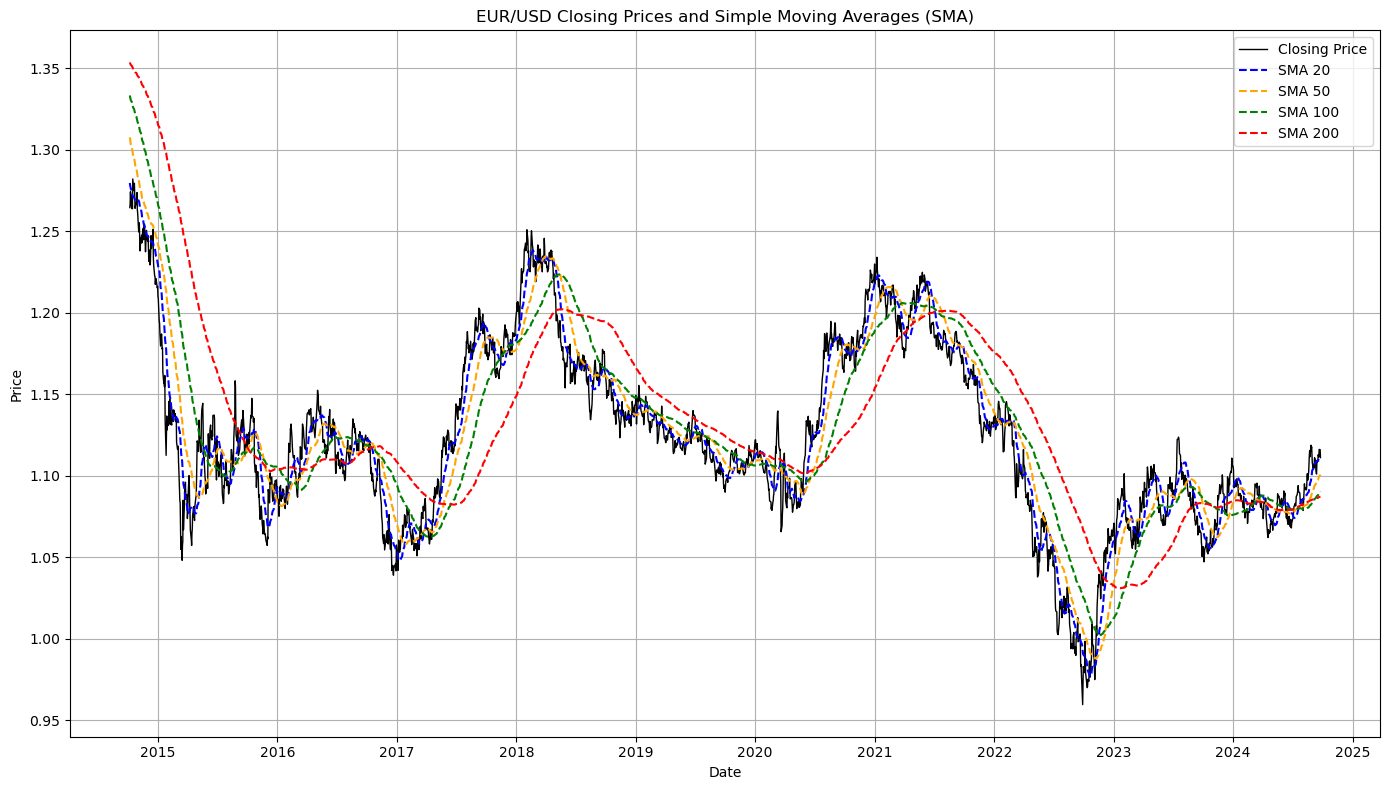

In [124]:
# Plotting the closing prices and SMAs
plt.figure(figsize=(14, 8))

# Plot the closing price
plt.plot(data['ds'], data['close'], label='Closing Price', color='black', linewidth=1)

# Plot the SMAs
plt.plot(data['ds'], data['SMA_20'], label='SMA 20', color='blue', linestyle='dashed')
plt.plot(data['ds'], data['SMA_50'], label='SMA 50', color='orange', linestyle='dashed')
plt.plot(data['ds'], data['SMA_100'], label='SMA 100', color='green', linestyle='dashed')
plt.plot(data['ds'], data['SMA_200'], label='SMA 200', color='red', linestyle='dashed')

# Formatting the plot
plt.title('EUR/USD Closing Prices and Simple Moving Averages (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


**Based on the SMA's calculated on the last 10 years, the probabilities till the end of this year seems to be quite positive**:

- the SMA's are in an order that corresponds to a **"BUY" signal** this autumn **for at least the short and median term**, **although theree has been a 10-year decreasing tendency** where maximum "peaks" are lower than the ones before
- However, we might be in a new upward period in general, recuperating a positive trend (with absotute minimums presenting an ascending) since it had reached "the bottom" in 2022 (0.96)

**Explanation of the plot :**

- **Closing Price Plot**: The plot shows the actual closing prices of the EUR/USD pair in black.

- **SMA Lines**: The SMAs for **20, 50, 100, and 200 days** are plotted with dashed lines in different colors, providing a clear view of the trends over time.

**Plot the days of the week with the greatest gains and greatest losses for EUR/USD**

To do so, we need to determine what is a loss (positive change) and what is a gain (negative change) for a stock market title or a forex.

[*********************100%***********************]  1 of 1 completed


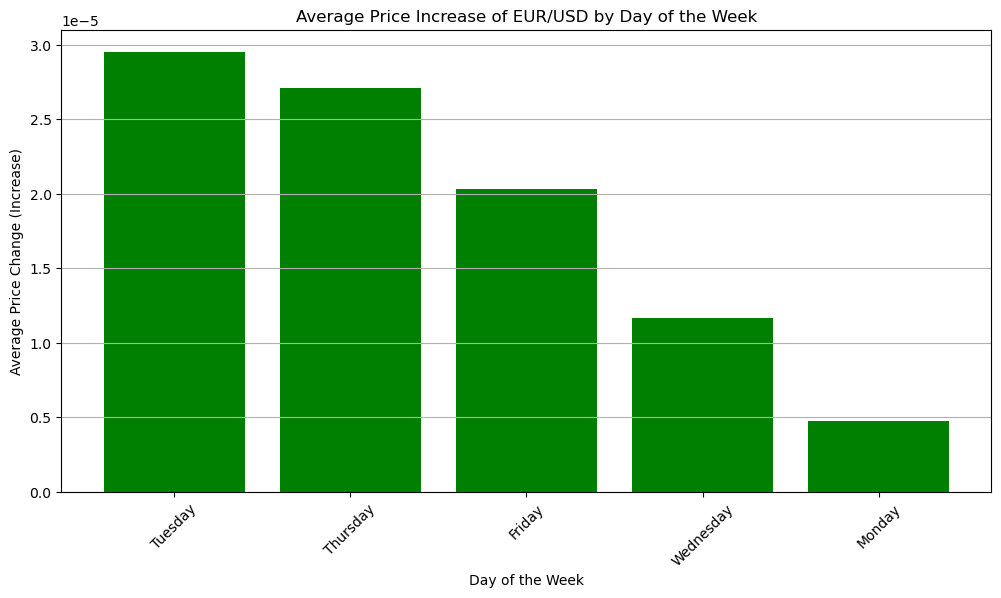

In [125]:
'''Step 1: Fetch and Prepare Data
'''

# Fetch historical data for EUR/USD
ticker = 'EURUSD=X'
data = yf.download(ticker, start="2014-01-01", end="2024-09-25")

# Reset index and rename columns for clarity
data.reset_index(inplace=True)
data.rename(columns={'Date': 'ds', 'Open': 'open', 'Close': 'close'}, inplace=True)
'''
Step 2: Calculate Daily Price Changes
Now, calculate the daily price change and add a new column to classify it by day of the week:'''

# Calculate daily price change
data['price_change'] = data['close'] - data['open']

# Add day of the week to the original data
data['day_of_week'] = data['ds'].dt.day_name()

'''Step 3: Group Data by Day of the Week
Next, group the data by day of the week and calculate the average price change for each day:
'''

# Group by day of the week and calculate the average price change
average_change = data.groupby('day_of_week')['price_change'].mean().reset_index()

# Ensure the order of days for better plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_change['day_of_week'] = pd.Categorical(average_change['day_of_week'], categories=days_order, ordered=True)
average_change = average_change.sort_values('day_of_week')

'''
Step 4: Separate Days for Positive and Negative Changes
Now, create separate dataframes for positive and negative changes:'''


# Separate into positive and negative changes
positive_changes = average_change[average_change['price_change'] > 0].sort_values(by='price_change', ascending=False)
negative_changes = average_change[average_change['price_change'] < 0].sort_values(by='price_change', ascending=True)


'''Step 5: Plotting
Finally, you can plot the average price changes for both positive and negative changes as descending bars.
'''
# 1. Bar Plot for Positive Changes

plt.figure(figsize=(12, 6))
plt.bar(positive_changes['day_of_week'], positive_changes['price_change'], color='green')
plt.title('Average Price Increase of EUR/USD by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price Change (Increase)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

- The days of the week with more gains for the period have been Tuesdays, Thursdays and Fridays.
- The one with the smallest gains were typically Mondays

In [126]:
# Check the total number of negative price changes
num_negative_changes = (data['price_change'] < 0).sum()
print(f"Number of negative price changes: {num_negative_changes}")

# Display the negative price changes
negative_changes_data = data[data['price_change'] < 0]

Number of negative price changes: 839


In [127]:
# Ensure to filter and group again
negative_changes = data[data['price_change'] < 0]
if not negative_changes.empty:
    negative_avg_change = negative_changes.groupby('day_of_week')['price_change'].mean().reset_index()
    negative_avg_change['day_of_week'] = pd.Categorical(negative_avg_change['day_of_week'], categories=days_order, ordered=True)
    negative_avg_change = negative_avg_change.sort_values('day_of_week')
else:
    print("No negative price changes to plot.")

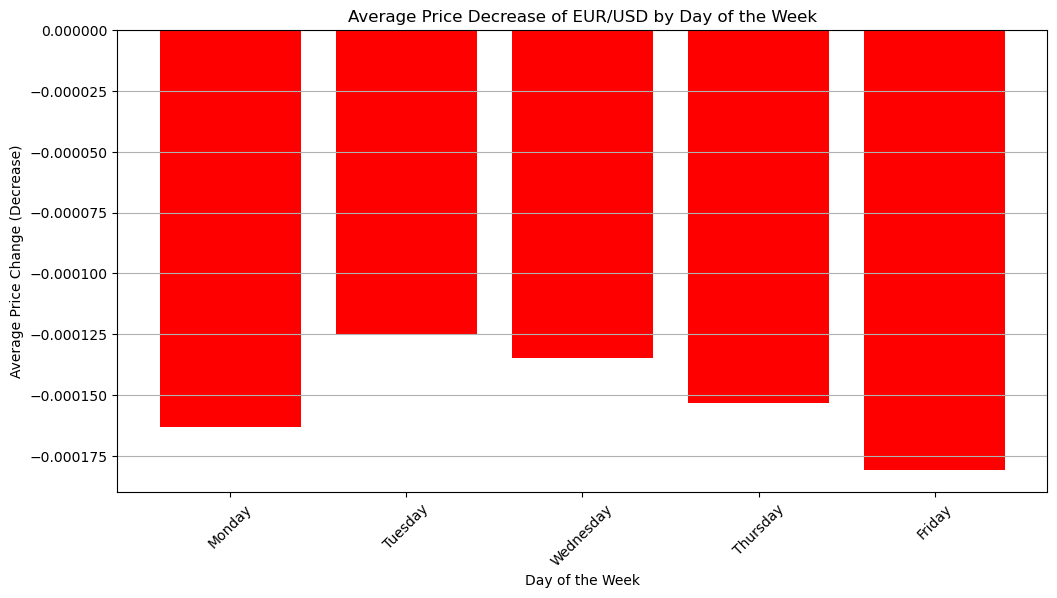

In [128]:
# lotting with Conditional Checks

if not negative_changes.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(negative_avg_change['day_of_week'], negative_avg_change['price_change'], color='red')
    plt.title('Average Price Decrease of EUR/USD by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Price Change (Decrease)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("No data to plot for average price decrease.")



- The days of the week with the greatest losses ("Bearish") for the period have been Fridays, Mondays and Thursdays.
- The one with the smallest losses ("Bullish") were typically Tuesdays
- This corresponds to the fact and observation that during very "Bearish" periods, weeks start and end in a "Bearish" way, only recuperating a little in the middle of the week.

### **Forcast to 90 days from NOW (Sept. 26, 2024) based on trends since January 2020**

In [42]:
ticker = 'EURUSD=X'
data = yf.download(ticker, start="2020-01-01", end="2024-09-25")

# Display the first few rows of the data

print(data.head())
print(data.tail())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2020-01-01  1.122083  1.122838  1.115947  1.122083   1.122083       0
2020-01-02  1.121894  1.122712  1.116682  1.122083   1.122083       0
2020-01-03  1.117081  1.118068  1.112570  1.117144   1.117144       0
2020-01-06  1.116246  1.120825  1.115810  1.116196   1.116196       0
2020-01-07  1.119583  1.119946  1.113487  1.119799   1.119799       0
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2024-09-18  1.112310  1.114082  1.110914  1.112310   1.112310       0
2024-09-19  1.111482  1.118068  1.107052  1.111482   1.111482       0
2024-09-20  1.116196  1.118168  1.113735  1.116196   1.116196       0
2024-09-23  1.116084  1.116819  1.108488  1.116084   1.116084       0
2024-09-24  1.111173  1.116346  1.110396  1.111173   1.111173       0


03:37:19 - cmdstanpy - INFO - Chain [1] start processing
03:37:21 - cmdstanpy - INFO - Chain [1] done processing


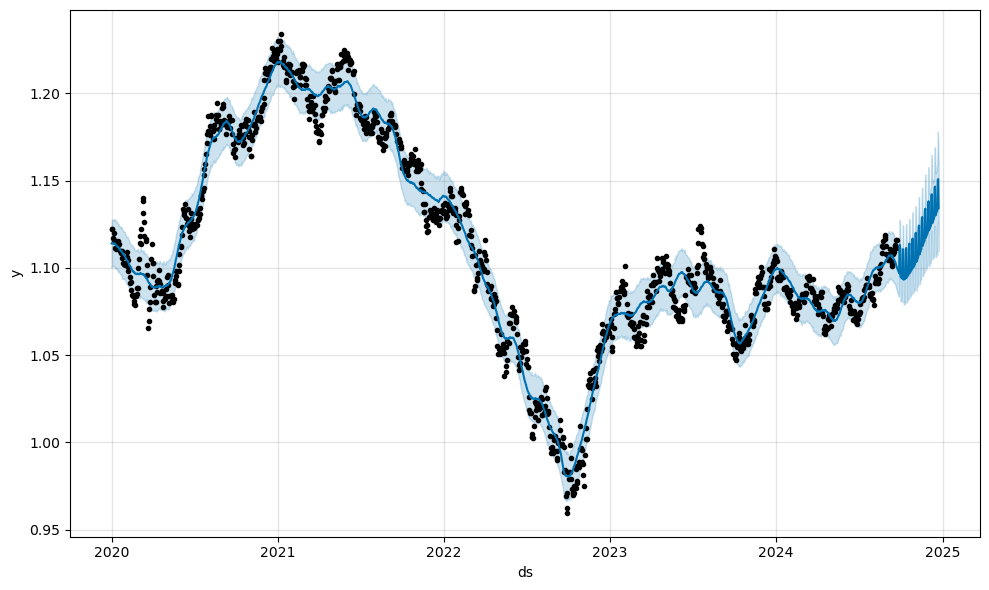

In [43]:
# Fetch data from Yahoo Finance

data.reset_index(inplace=True)
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Initialize Prophet and fit the data
model = Prophet()
model.fit(data[['ds', 'y']])

# Make a future dataframe for predictions to next 90 days:

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)

Based on the last 4 years, the 3-months forecast till the endof this year seems to be quite positive

### **Forcast to 180 days from NOW (Sept. 26, 2024) based on trends since January 2014**

In [44]:
ticker = 'EURUSD=X'
data = yf.download(ticker, start="2014-01-01", end="2024-09-25")

# Display the first few rows of the data

print(data.head())
print(data.tail())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2014-01-01  1.374495  1.377904  1.374400  1.374495   1.374495       0
2014-01-02  1.376595  1.377467  1.363271  1.376671   1.376671       0
2014-01-03  1.366624  1.367297  1.360170  1.366662   1.366662       0
2014-01-06  1.359582  1.364610  1.357279  1.359601   1.359601       0
2014-01-07  1.363066  1.365799  1.359878  1.363196   1.363196       0
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2024-09-18  1.112310  1.114082  1.110914  1.112310   1.112310       0
2024-09-19  1.111482  1.118068  1.107052  1.111482   1.111482       0
2024-09-20  1.116196  1.118168  1.113735  1.116196   1.116196       0
2024-09-23  1.116084  1.116819  1.108488  1.116084   1.116084       0
2024-09-24  1.111173  1.116346  1.110396  1.111173   1.111173       0


03:42:13 - cmdstanpy - INFO - Chain [1] start processing
03:42:16 - cmdstanpy - INFO - Chain [1] done processing


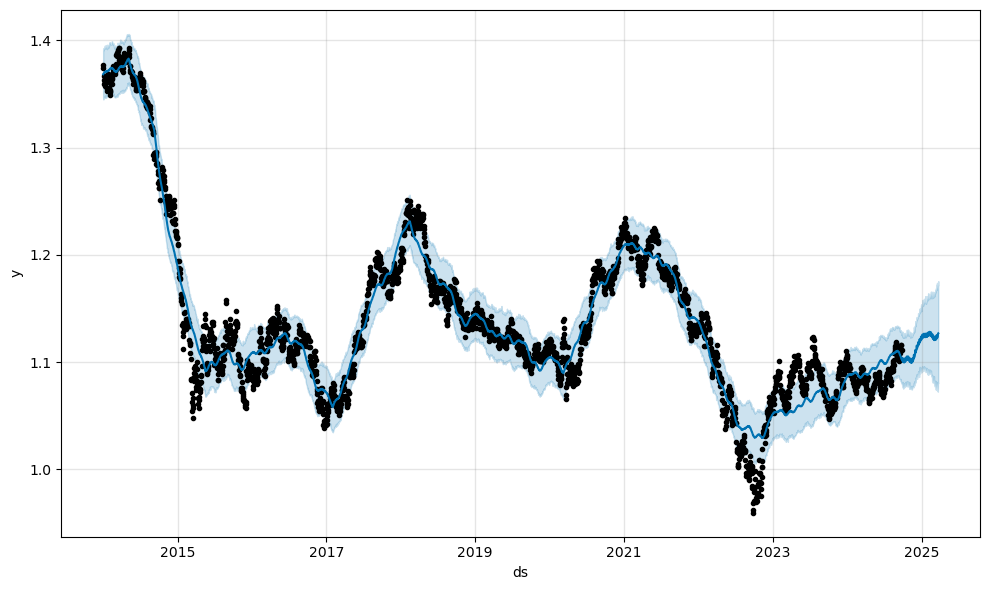

In [47]:
# Fetch data from Yahoo Finance

data.reset_index(inplace=True)
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Initialize Prophet and fit the data
model = Prophet()
model.fit(data[['ds', 'y']])

# Make a future dataframe for predictions to next 180 days:

future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)

Based on the 10 last years, the forcast for half of the year to come (180 days) is still positive, but it has been stable for a while and it does not discard any tendency (flat in a wait and see manner, even going up or down).

### **Forcast to 90 days based on trends since January 2023 to December 2023**

In [116]:
# Fetch historical data for EUR/USD

ticker = 'EURUSD=X'

# Make dataframe with data of year 2023:

data = yf.download(ticker, start="2023-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2023-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       260 non-null    float64
 1   High       260 non-null    float64
 2   Low        260 non-null    float64
 3   Close      260 non-null    float64
 4   Adj Close  260 non-null    float64
 5   Volume     260 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


1. Volume at 0:

The volume in stock market data typically represents the number of shares or contracts traded during a given period. However, for currencies or forex pairs (like EUR/USD), there isn't a direct "volume" figure available because the foreign exchange market is decentralized, unlike stock markets, which are more centralized. As a result, Yahoo Finance often returns 0 for volume when downloading data for forex pairs, which is normal in this case.

2. Adj Close (Adjusted Close):

The Adjusted Close price is the closing price of the asset after accounting for any actions that affect its value, such as dividends, stock splits, or other adjustments that occur after the market closes. For stocks, this is useful because it gives a more accurate representation of the stock’s true value over time.

However, in the context of forex (EUR/USD), Adj Close is often the same as the Close price since there are no dividends, splits, or adjustments in the foreign exchange market.

In your case, you see the same value for Close and Adj Close, which is expected for forex data.

Conclusion:

Volume at 0: This is typical for forex data as there's no centralized volume tracking.
Adj Close: For EUR/USD, it’s the same as the Close price because forex markets don't have adjustments like dividends or splits.

You can safely ignore the Volume and Adj Close columns for forex data and focus on the Open, High, Low, and Close columns for your analysis.

In [118]:
from prophet import Prophet

# Prepare the data for Prophet (rename columns as needed)

data = data.reset_index()  # Reset index to get Date as a column
data = data[['Date', 'Close']]  # Only keep Date and Close price
data.columns = ['ds', 'y']  # Rename columns for Prophet

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      260 non-null    datetime64[ns]
 1   y       260 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [ ]:
# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data)

# Make a future dataframe for predictions to next 90 days (next 90 days after end of 2023, meaning: january, february, march and part of abril 2024):

future = model.make_future_dataframe(periods=90)  
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


03:29:30 - cmdstanpy - INFO - Chain [1] start processing
03:29:30 - cmdstanpy - INFO - Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2023-01-02  1.063465    1.055833    1.071738
1 2023-01-03  1.065148    1.057151    1.073313
2 2023-01-04  1.065776    1.057874    1.073000
3 2023-01-05  1.067524    1.059665    1.075029
4 2023-01-06  1.068027    1.059739    1.075439


In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds      yhat  yhat_lower  yhat_upper
345 2024-03-24  1.162098    1.078449    1.245797
346 2024-03-25  1.159595    1.073897    1.244695
347 2024-03-26  1.160867    1.076371    1.250896
348 2024-03-27  1.161084    1.074857    1.249285
349 2024-03-28  1.162420    1.071791    1.253201


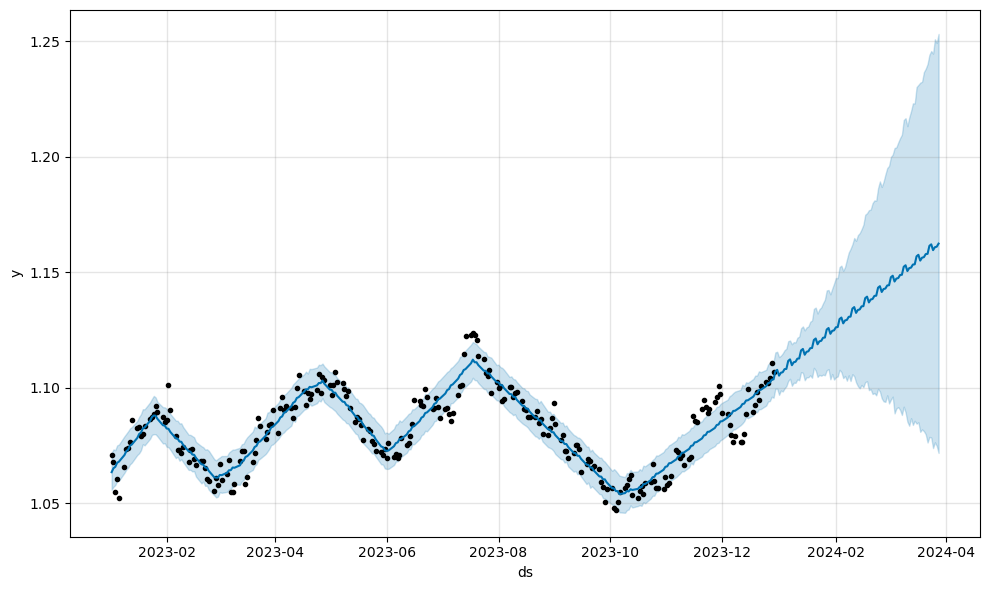

In [ ]:
# Plot forecast
fig = model.plot(forecast)

On this plot that only has trained with data from 1 year, we can see that the predictions are very broadand imprecise. 

- We know that the actual prices went downwards not upwards for the predicated period
- Nontheless, the value of EUR/USD almost followed the "lower price range line", "bearish" probability shown above for winter-spring 2024

## Decision Making

After generating forecasts, we can make decisions based on predicted trends:

* Buy: If the forecast shows a significant upward trend.
* Sell: If the forecast indicates a downward trend.
* Hold/Don't do anything: If the forecast shows no significant change or if there is high uncertainty.

## Conclusion

The probabilities shown on the graphs seem to be that the EUR/USD will continue to go up for the 3 months left of 2024 and for the 3 months after that, it is not very sure, since it will maybe stop growing and all trends are possible.